<a href="https://colab.research.google.com/github/shindejayesh987/Deep-Learning-Using-Pytorch/blob/main/DeepRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,LSTM,GRU

In [2]:
# Load the IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to have the same length
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# Define the RNN model
model = Sequential([
    Embedding(10000, 32, input_length=100), # Embedding layer to convert words to vectors
    SimpleRNN(5, return_sequences=True),   # RNN layer with 5 units
    SimpleRNN(5),                          # Another RNN layer with 5 units
    Dense(1, activation='sigmoid')          # Output layer for binary classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 5)            190       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 55        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 320251 (1.22 MB)
Trainable params: 320251 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Define the LSTM model
model = Sequential([
    Embedding(10000, 32, input_length=100),
    LSTM(5, return_sequences=True),
    LSTM(5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm_2 (LSTM)               (None, 100, 5)            760       
                                                                 
 lstm_3 (LSTM)               (None, 5)                 220       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320986 (1.22 MB)
Trainable params: 320986 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Define the GRU model
model = Sequential([
    Embedding(10000, 32, input_length=100),
    GRU(5, return_sequences=True),
    GRU(5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           320000    
                                                                 
 gru (GRU)                   (None, 100, 5)            585       
                                                                 
 gru_1 (GRU)                 (None, 5)                 180       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320771 (1.22 MB)
Trainable params: 320771 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 40s 59ms/step - loss: 0.5026 - accuracy: 0.7461 - val_loss: 0.3980 - val_accuracy: 0.8310
Epoch 2/10
625/625 [==============================] - 34s 54ms/step - loss: 0.3090 - accuracy: 0.8796 - val_loss: 0.3623 - val_accuracy: 0.8474
Epoch 3/10
625/625 [==============================] - 34s 55ms/step - loss: 0.2310 - accuracy: 0.9176 - val_loss: 0.4080 - val_accuracy: 0.8306
Epoch 4/10
625/625 [==============================] - 34s 55ms/step - loss: 0.1768 - accuracy: 0.9402 - val_loss: 0.3990 - val_accuracy: 0.8398
Epoch 5/10
625/625 [==============================] - 35s 55ms/step - loss: 0.1335 - accuracy: 0.9578 - val_loss: 0.4700 - val_accuracy: 0.8354
Epoch 6/10
625/625 [==============================] - 36s 58ms/step - loss: 0.0983 - accuracy: 0.9704 - val_loss: 0.5280 - val_accuracy: 0.8306
Epoch 7/10
625/625 [==============================] - 39s 63ms/step - loss: 0.0708 - accuracy: 0.9812 - val_loss: 0.5979 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

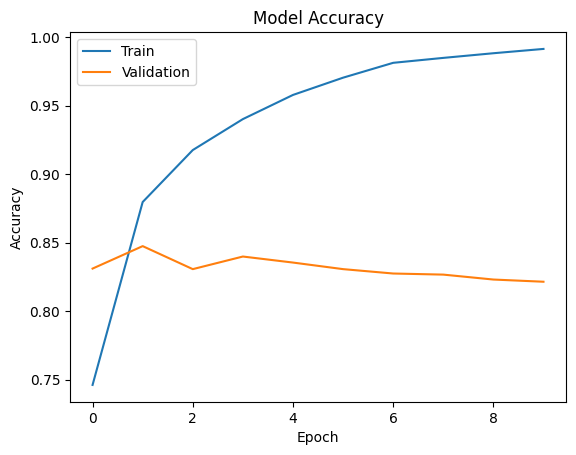

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show

In [11]:
import matplotlib.pyplot as plt